In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML
import master_read as m
import efit_plots as e
import os
import sys

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['animation.html'] = 'html5'

In [3]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/db_tear/dt-nodiff-64nzd.scratch/"

In [4]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 197
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J^1', 'J^2', 'J^3', 'Jx(pi+pe)', 'JxRho', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [5]:
rho_0 = pxr.load_array(0,13,0,4)
rho_100 = pxr.load_array(0,13,100,101)
rho_125 = pxr.load_array(0,13,125,126)
rho_150 = pxr.load_array(0,13,150,151)
rho_170 = pxr.load_array(0,13,170,171)
rho_end = pxr.load_array(0,13,196,197)

In [37]:
rho_0t = np.mean(rho_0,axis=2)
rho_100t = np.mean(rho_100,axis=2)
rho_125t = np.mean(rho_125,axis=2)
rho_150t = np.mean(rho_150,axis=2)
rho_170t = np.mean(rho_170,axis=2)
rho_endt = np.mean(rho_end,axis=2)

In [32]:
Prs_0 = pxr.load_array(0,6,0,1)
Prs_100 = pxr.load_array(0,6,100,101)
Prs_125 = pxr.load_array(0,6,125,126)
Prs_150 = pxr.load_array(0,6,150,151)
Prs_170 = pxr.load_array(0,6,170,171)
Prs_end = pxr.load_array(0,6,196,197)

In [33]:
Prs_0t = np.mean(Prs_0,axis=2)
Prs_100t = np.mean(Prs_100,axis=2)
Prs_125t = np.mean(Prs_125,axis=2)
Prs_150t = np.mean(Prs_150,axis=2)
Prs_170t = np.mean(Prs_170,axis=2)
Prs_endt = np.mean(Prs_end,axis=2)

In [34]:
T_0 = pxr.load_array(3,5,0,1)
T_100 = pxr.load_array(3,5,100,101)
T_125 = pxr.load_array(3,5,125,126)
T_150 = pxr.load_array(3,5,150,151)
T_170 = pxr.load_array(3,5,170,171)
T_end = pxr.load_array(3,5,196,197)

In [35]:
T_0t = np.mean(T_0,axis=2)
T_100t = np.mean(T_100,axis=2)
T_125t = np.mean(T_125,axis=2)
T_150t = np.mean(T_150,axis=2)
T_170t = np.mean(T_170,axis=2)
T_endt = np.mean(T_end,axis=2)

In [42]:
J3_0 = pxr.load_array(1,6,0,1)
J3_100 = pxr.load_array(1,6,100,101)
J3_125 = pxr.load_array(1,6,125,126)
J3_150 = pxr.load_array(1,6,150,151)
J3_175 = pxr.load_array(1,6,175,176)
J3_end = pxr.load_array(1,6,196,197)

In [43]:
J3t_0 = np.mean(J3_0,axis=2)
J3t_100 = np.mean(J3_100,axis=2)
J3t_125 = np.mean(J3_125,axis=2)
J3t_150 = np.mean(J3_150,axis=2)
J3t_175 = np.mean(J3_175,axis=2)
J3t_end = np.mean(J3_end,axis=2)

In [44]:
J_3_0 = pxr.load_array(2,5,0,1)
J_3_100 = pxr.load_array(2,5,100,101)
J_3_125 = pxr.load_array(2,5,125,126)
J_3_150 = pxr.load_array(2,5,150,151)
J_3_175 = pxr.load_array(2,5,175,176)
J_3_end = pxr.load_array(2,5,196,197)

In [45]:
J_3t_0 = np.mean(J_3_0,axis=2)
J_3t_100 = np.mean(J_3_100,axis=2)
J_3t_125 = np.mean(J_3_125,axis=2)
J_3t_150 = np.mean(J_3_150,axis=2)
J_3t_175 = np.mean(J_3_175,axis=2)
J_3t_end = np.mean(J_3_end,axis=2)

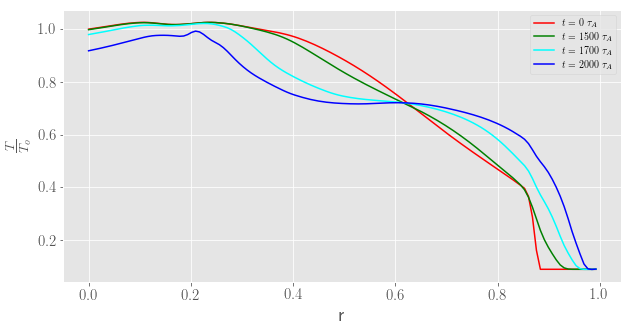

In [55]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_0t[:,0,0]/T_0t[0,0,0],"r",label=r"$t = 0\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_100t[:,0,0]/T_0t[0,0,0],"orange",label=r"$t = 1000\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_125t[:,0,0]/T_0t[0,0,0],"y",label=r"$t = 1250\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_150t[:,0,0]/T_0t[0,0,0],"g",label=r"$t = 1500\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_170t[:,0,0]/T_0t[0,0,0],"cyan",label=r"$t = 1700\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],T_endt[:,0,0]/T_0t[0,0,0],"b",label=r"$t = 2000\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\frac{T}{T_o}$")
plt.show()

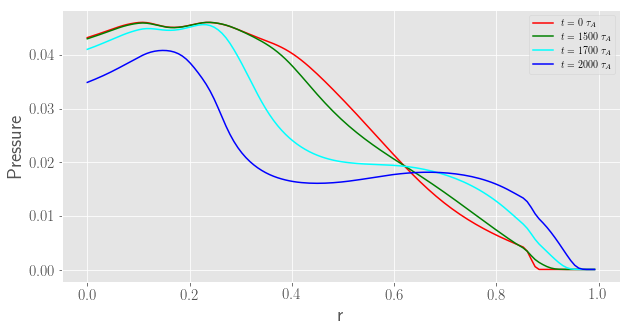

In [56]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_0t[:,0,0],"r",label=r"$t = 0\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_100t[:,0,0],"orange",label=r"$t = 1000\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_125t[:,0,0],"y",label=r"$t = 1250\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_150t[:,0,0],"g",label=r"$t = 1500\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_170t[:,0,0],"cyan",label=r"$t = 1700\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],Prs_endt[:,0,0],"b",label=r"$t = 2000\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"Pressure")
plt.show()

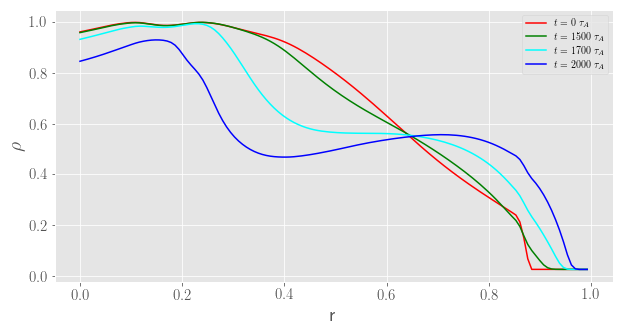

In [57]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_0t[:,0,0],"r",label=r"$t = 0\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_100t[:,0,0],"orange",label=r"$t = 1000\;\tau_A$")
#plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_125t[:,0,0],"y",label=r"$t = 1250\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_150t[:,0,0],"g",label=r"$t = 1500\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_170t[:,0,0],"cyan",label=r"$t = 1700\;\tau_A$")
plt.plot([x/T_0.shape[0] for x in range(T_0.shape[0])],rho_endt[:,0,0],"b",label=r"$t = 2000\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\rho$")
plt.show()

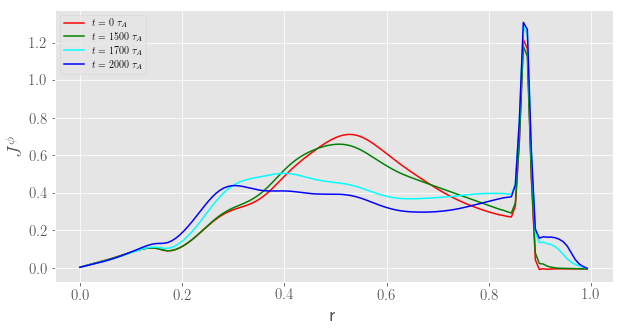

In [58]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_0[:,0,0],"r",label=r"$t = 0\;\tau_A$")
#plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_100[:,0,0],"orange",label=r"$t = 1000\;\tau_A$")
#plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_125[:,0,0],"y",label=r"$t = 1250\;\tau_A$")
plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_150[:,0,0],"g",label=r"$t = 1500\;\tau_A$")
plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_175[:,0,0],"cyan",label=r"$t = 1700\;\tau_A$")
plt.plot([x/J3t_0.shape[0] for x in range(J3t_0.shape[0])],-J3t_end[:,0,0],"b",label=r"$t = 2000\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$J^{\phi}$")
plt.show()

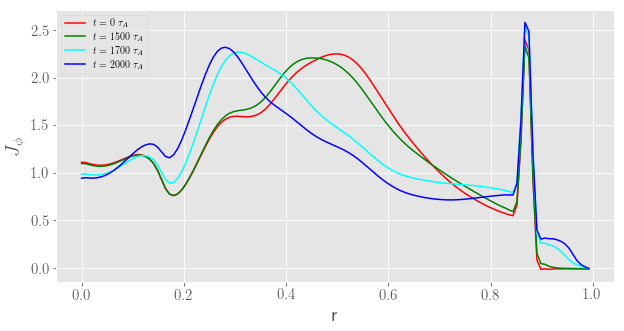

In [61]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_0[:,0,0],"r",label=r"$t = 0\;\tau_A$")
#plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_100[:,0,0],"orange",label=r"$t = 1000\;\tau_A$")
#plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_125[:,0,0],"y",label=r"$t = 1250\;\tau_A$")
plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_150[:,0,0],"g",label=r"$t = 1500\;\tau_A$")
plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_175[:,0,0],"cyan",label=r"$t = 1700\;\tau_A$")
plt.plot([x/J_3t_0.shape[0] for x in range(J_3t_0.shape[0])],-J_3t_end[:,0,0],"b",label=r"$t = 2000\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

## Movies

In [8]:
def eqdsk_info():
    """Extracts parameters from the eqdsk file."""
    global a
    sys.stdout = open(os.devnull, 'w')
    m.read_geqdsk(eqdsk_file)
    m.struct_hor_ax_det()
    e.gridsNunits()
    e.intersections()
    sys.stdout = sys.__stdout__

In [9]:
eqdsk_file = "/users/giannis_kx/eqdsks/eqdsk_9MA_SS.Gpolevoa"

In [10]:
eqdsk_info()

In [11]:
# Extract the separatrix
r_sep = [x for x in m.DS.rbbbs]
z_sep = [x for x in m.DS.zbbbs]

In [18]:
# Bug fix for animating contour plots    
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)

In [5]:
T = pxr.load_array(3,5,100,197)

In [6]:
T_tor = np.mean(T,axis=2)

In [7]:
dT = T-T_tor[:,:,np.newaxis,:]

In [15]:
Tnorm = 1/T[0,0,0,0]

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


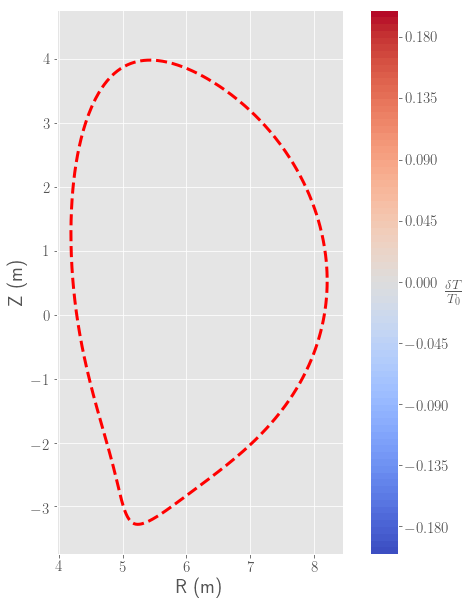

In [21]:
# Animation
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(96):
    #im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,np.log10(Te[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,(dT[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    text = 't = '+str((i+100)*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.6, 0.94), xycoords='axes fraction',fontsize=14)

    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################

    ims.append(im.collections+[an])
cbar = plt.colorbar()
#cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)
cbar.set_label(r"$\frac{\delta T}{T_{0}}$",rotation=0)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)


In [22]:
HTML(ani.to_html5_video())

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


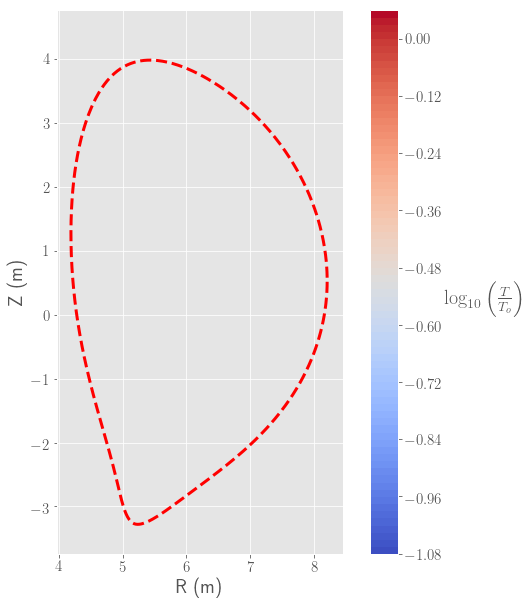

In [23]:
# Animation
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(96):
    im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,np.log10(T[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    #im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,(dT[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    text = 't = '+str((i+100)*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.6, 0.94), xycoords='axes fraction',fontsize=14)

    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################

    ims.append(im.collections+[an])
cbar = plt.colorbar()
cbar.set_label(r"$\log_{10}\left(\frac{T}{T_o}\right)$",rotation=0,labelpad=42)
#cbar.set_label(r"$\frac{\delta T}{T_{0}}$",rotation=0)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)


In [24]:
HTML(ani.to_html5_video())

In [25]:
J_3 = pxr.load_array(2,5,100,197)

In [26]:
J_3_tor = np.mean(J_3,axis=2)

In [27]:
dJ_3 = J_3-J_3_tor[:,:,np.newaxis,:]

In [29]:
J_3o = 1/J_3[0,0,0,0]

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


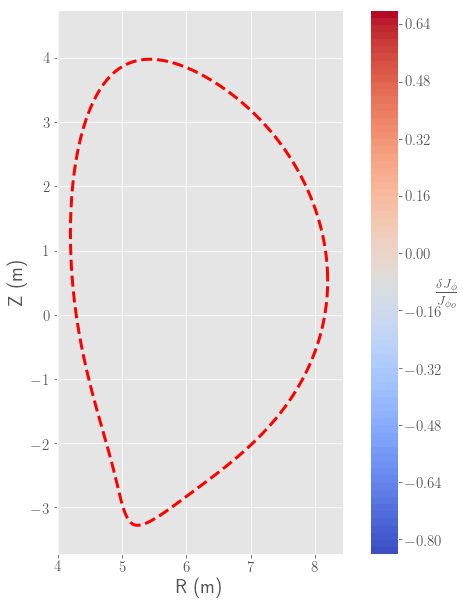

In [31]:
# Animation
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(96):
    im = plt.contourf(pxr.Xc[:,:,0]*e.a,pxr.Zc[:,:,0]*e.a,(dJ_3[:,:,0,i]*J_3o),80,cmap="coolwarm")
    text = 't = '+str((i+100)*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.6, 0.94), xycoords='axes fraction',fontsize=14)

    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################

    ims.append(im.collections+[an])
cbar = plt.colorbar()
#cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)
cbar.set_label(r"$\frac{\delta{J_{\phi}}}{J_{\phi_o}}$",rotation=0)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)


In [32]:
HTML(ani.to_html5_video())

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


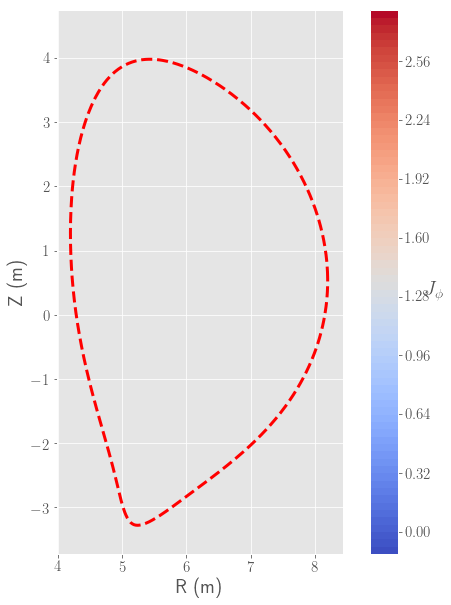

In [35]:
# Animation
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(96):
    im = plt.contourf(pxr.Xc[:,:,0]*e.a,pxr.Zc[:,:,0]*e.a,(-J_3[:,:,0,i]),80,cmap="coolwarm")
    text = 't = '+str((i+100)*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.6, 0.94), xycoords='axes fraction',fontsize=14)

    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################

    ims.append(im.collections+[an])
cbar = plt.colorbar()
#cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)
cbar.set_label(r"$J_{\phi}$",rotation=0)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)


In [ ]:
HTML(ani.to_html5_video())

## Node projection

In [5]:
t_start = 0
t_end = 4

In [6]:
B1c = pxr.load_array(1,0,t_start,t_end)
B2c = pxr.load_array(1,1,t_start,t_end)
B3c = pxr.load_array(1,2,t_start,t_end)
psi = pxr.load_array(3,4,t_start,t_end)

In [7]:
B_1c = pxr.load_array(2,0,t_start,t_end)
B_2c = pxr.load_array(2,1,t_start,t_end)
B_3c = pxr.load_array(2,2,t_start,t_end)

In [8]:
pxr.Axes_of_Interpolation(psi)

In [9]:
pxr.Grid_for_Cell_Interpolation(B1c)

In [10]:
B1c_int = pxr.Grid_Cell_Interpolation_Single_Array(B1c)
B2c_int = pxr.Grid_Cell_Interpolation_Single_Array(B2c)
B3c_int = pxr.Grid_Cell_Interpolation_Single_Array(B3c)

In [11]:
B_1c_int = pxr.Grid_Cell_Interpolation_Single_Array(B_1c)
B_2c_int = pxr.Grid_Cell_Interpolation_Single_Array(B_2c)
B_3c_int = pxr.Grid_Cell_Interpolation_Single_Array(B_3c)

In [18]:
psi_int = pxr.Grid_Interpolation_Single_Array(psi)

In [19]:
psi_tor = np.mean(psi,axis=2)

In [20]:
psit_int = pxr.Grid_Interpolation_Single_Array(psi_tor,tor=True)

In [15]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [12]:
pxr.MeshGrids_Creation()

In [13]:
B1 = pxr.C2N_Evaluation(B1c_int,B1c)

In [14]:
B2 = pxr.C2N_Evaluation(B2c_int,B2c)
B3 = pxr.C2N_Evaluation(B1c_int,B3c)

In [15]:
B_1 = pxr.C2N_Evaluation(B_1c_int,B_1c)
B_2 = pxr.C2N_Evaluation(B_2c_int,B_2c)
B_3 = pxr.C2N_Evaluation(B_3c_int,B_3c)

In [16]:
B1_int = pxr.Grid_Interpolation_Single_Array(B1)
B2_int = pxr.Grid_Interpolation_Single_Array(B2)
B3_int = pxr.Grid_Interpolation_Single_Array(B3)

In [17]:
B_1_int = pxr.Grid_Interpolation_Single_Array(B_1)
B_2_int = pxr.Grid_Interpolation_Single_Array(B_2)
B_3_int = pxr.Grid_Interpolation_Single_Array(B_3)

In [23]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)

In [21]:
B_1t = np.mean(B_1,axis=2)
B_2t = np.mean(B_2,axis=2)

In [24]:
B1t_int = pxr.Grid_Interpolation_Single_Array(B1t,tor=True)
B2t_int = pxr.Grid_Interpolation_Single_Array(B2t,tor=True)

In [25]:
B_1t_int = pxr.Grid_Interpolation_Single_Array(B_1t,tor=True)
B_2t_int = pxr.Grid_Interpolation_Single_Array(B_2t,tor=True)

In [26]:
Bpolsq = np.multiply(B1t,B_1t) + np.multiply(B2t,B_2t)

In [27]:
Bpolsq_int = pxr.Grid_Interpolation_Single_Array(Bpolsq[:,:,3],tor=True)

In [91]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [29]:
import scipy.optimize

In [27]:
x0=(0.9,4.44)

In [32]:
scipy.optimize.fmin(Bpolsq_int,x0)

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61


array([ 0.92973666,  4.71240854])

In [92]:
Xpnt = pxr.findXpoint(Bpolsq,3,x0)

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61


In [52]:
Xpnt[1]

4.7124085447619972

In [62]:
psit_int((Xpnt[0],Xpnt[1],0))

array(0.3011831181087389)

In [43]:
psi_tor.shape

(129, 65, 100)

In [93]:
pxr.magneticAxisAndXpoint(psi_tor,Bpolsq,0,x0)

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61


(-0.012702997655953252, array(0.3011831181087389))

In [28]:
psi_min,norm = pxr.Normalization_numbers(psi_tor,Bpolsq,x0)

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 32
         Function evaluations: 61
Optimization terminated successful

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


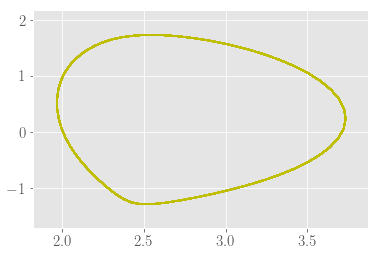

In [29]:
r_of_psi_array,emaxis,umaxis = pxr.create_r_psi_list(psi_tor,Bpolsq,x0)

In [30]:
r_of_psi_array.shape

(100, 101)

In [88]:
len(psi_min)

4

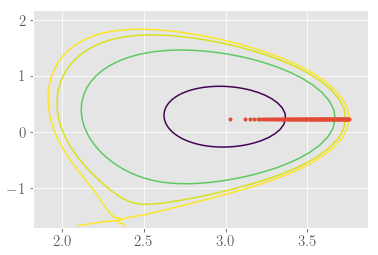

In [37]:
t=50
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi_tor[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.2,0.8,0.95,1.0])
plt.plot(pxr.X_int((r_of_psi_array[2,:],0,0)),pxr.Z_int((r_of_psi_array[t,:],0,0)),".")
plt.show()

In [73]:
len(umaxis)

4

In [100]:
psi_norm = psit_int((Res[0],Res[1],0))

In [103]:
psi_norm

array(0.30118299724077563)

In [32]:
pxr.Coordinate_Maps_Interpolations()

In [85]:
pxr.X_int((0.92971606,4.71238738,0))

array(2.3548717834355086)

In [34]:
B1t_int((2.2,-1.5,0))

array(0.0)

In [26]:
scipy.optimize.fmin(B2t_int,np.array([2.4,-1.5,0]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 59


array([ 2.4, -1.5,  0. ])

In [33]:
psi_min, norm = pxr.Normalization_numbers(psi_tor,psit_int,B1t,B2t)

ValueError: Expect x to be a 1-D sorted array_like.

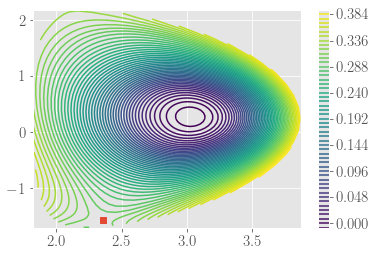

In [86]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_tor[:,:,0],60)
#plt.plot(2.4,-1.5,"s")
plt.plot(pxr.X_int((0.92971606,4.71238738,0)),pxr.Z_int((0.92971606,4.71238738,0)),"s")
plt.colorbar()
plt.show()

In [66]:
46*(2*np.pi/65)

4.446561909696323

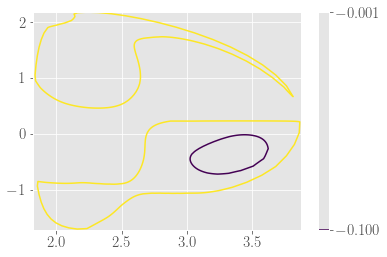

In [76]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1t[:,:,0],levels=[-0.1,-0.001])
plt.plot()
plt.colorbar()
plt.show()

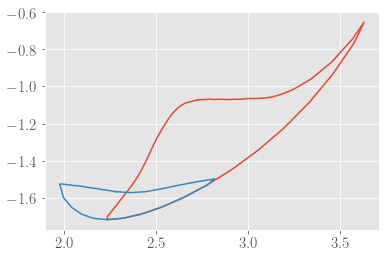

In [47]:
A = pxr.findLevelsZero(B1t,B2t,0,-1.4)

In [49]:
len(A)

4

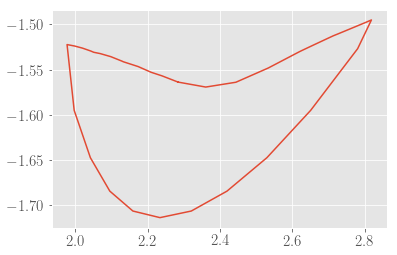

In [53]:
plt.plot(A[2],A[3])